<a href="https://colab.research.google.com/github/2312043/2312043.github.io/blob/main/dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Merging Datasets

In [ ]:
import pandas as pd
import re
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
file_path_1 = '/content/drive/MyDrive/Dissertation/depression_tweets.csv'
file_path_2 = '/content/drive/MyDrive/Dissertation/control_tweets.csv'


In [ ]:
# Read the CSV files into pandas DataFrames
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Concatenate the DataFrames vertically
merged_df = pd.concat([df1, df2], ignore_index=True)

print(merged_df)

         Unnamed: 0  labels                 author_id  \
0                 0       1  81d7e8dd5cdec1faf655f0b4   
1                 1       1  6ecdd309320b08aa5690b390   
2                 2       1  4c5ced2dcd98da3eb7b7ccdb   
3                 3       1  05dba5f0528ba3fc0f5ec5f5   
4                 4       1  68b1fa290814efc4d3825acb   
...             ...     ...                       ...   
4284233     2481934       0  2caf9fc3a7b179ed26acef22   
4284234     2481935       0  847e1e869a5d6f56d90ea0e0   
4284235     2481936       0  48e1979de979a9a087241642   
4284236     2481937       0  af3a381b78585f08e08ab236   
4284237     2481938       0  f3e948e42280d5f2f9685798   

                                                      text  \
0                                                    yayay   
1                              they’ve already lost twice.   
2        i sure would be laughing. horror movies are co...   
3        young k really reads the letters he receives😭💕...   
4    

In [ ]:
merged_df = merged_df.drop("Unnamed: 0", axis=1)

In [ ]:
merged_df

,labels,author_id,text,created_at
0,1,81d7e8dd5cdec1faf655f0b4,yayay,2021-06-19 14:22:36-04:00
1,1,6ecdd309320b08aa5690b390,they’ve already lost twice.,2022-01-03 05:33:23-05:00
2,1,4c5ced2dcd98da3eb7b7ccdb,i sure would be laughing. horror movies are co...,2021-07-16 16:46:45-04:00
3,1,05dba5f0528ba3fc0f5ec5f5,young k really reads the letters he receives😭💕...,2021-10-24 01:30:06-04:00
4,1,68b1fa290814efc4d3825acb,people telling me their first impression of me...,2021-09-03 18:04:03-04:00
...,...,...,...,...
4284233,0,2caf9fc3a7b179ed26acef22,i just knew she’d sing will you still love me ...,2021-10-31 04:35:29-04:00
4284234,0,847e1e869a5d6f56d90ea0e0,ive eaten rice and gravy before and it was jus...,2021-04-23 08:56:00-04:00
4284235,0,48e1979de979a9a087241642,"no predator shit, but if you patient enough so...",2021-11-17 17:24:35-05:00
4284236,0,af3a381b78585f08e08ab236,now back to this,2021-05-14 07:17:34-04:00


In [ ]:
merged_df['labels'].value_counts()

,count
labels,
0,2481939
1,1802299


In [ ]:
merged_df.to_csv('/content/drive/MyDrive/Dissertation/merged_data.csv', index=True)

# Noise Removal

In [ ]:
import pandas as pd
import re
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

file_path = '/content/drive/MyDrive/Dissertation/merged_data.csv'

In [ ]:
# Print the first few lines to verify the structure
with open(file_path, 'r') as file:
    for _ in range(5):
        print(file.readline())



,labels,author_id,text,created_at

0,1,81d7e8dd5cdec1faf655f0b4,yayay,2021-06-19 14:22:36-04:00

1,1,6ecdd309320b08aa5690b390,they’ve already lost twice.,2022-01-03 05:33:23-05:00

2,1,4c5ced2dcd98da3eb7b7ccdb,"i sure would be laughing. horror movies are comedies to me. i’d be laughing at the killer, ppl getting killed going “see that couldn’t be me. she shouldn’t have fell and quit running”, cracking joke and pass the killer the weed like “chill out fam. hit this weed”",2021-07-16 16:46:45-04:00

3,1,05dba5f0528ba3fc0f5ec5f5,"young k really reads the letters he receives😭💕 op said she wanna tell young k something she hasnt been saying for awhile. and when young k asked what it is, op said ""i really like you a lot!"". but young k said op said it many times, even in letters😭",2021-10-24 01:30:06-04:00



In [ ]:
df = pd.read_csv(file_path, sep=',')
print(df.columns)  # Check if the columns are correctly identified

df.head()

Index(['Unnamed: 0', 'labels', 'author_id', 'text', 'created_at'], dtype='object')


,Unnamed: 0,labels,author_id,text,created_at
0,0,1,81d7e8dd5cdec1faf655f0b4,yayay,2021-06-19 14:22:36-04:00
1,1,1,6ecdd309320b08aa5690b390,they’ve already lost twice.,2022-01-03 05:33:23-05:00
2,2,1,4c5ced2dcd98da3eb7b7ccdb,i sure would be laughing. horror movies are co...,2021-07-16 16:46:45-04:00
3,3,1,05dba5f0528ba3fc0f5ec5f5,young k really reads the letters he receives😭💕...,2021-10-24 01:30:06-04:00
4,4,1,68b1fa290814efc4d3825acb,people telling me their first impression of me...,2021-09-03 18:04:03-04:00


In [ ]:
# Check for missing values
df.isnull().sum()


,0
Unnamed: 0,0
labels,0
author_id,0
text,215
created_at,0


In [ ]:
# Drop rows with any missing values
df.dropna(inplace=True)


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Unnamed: 0,0
labels,0
author_id,0
text,0
created_at,0


In [ ]:
df[df.columns[0]].count()


4284023

In [ ]:
# Attempt to convert 'created_at' to datetime, handling errors
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Check for values that couldn't be converted
print(df[df['created_at'].isnull()])

<ipython-input-15-f49b7cbf9488>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


Empty DataFrame
Columns: [Unnamed: 0, labels, author_id, text, created_at]
Index: []


In [ ]:
import re
import string

def clean_text(text):
    # Extract mentions
    mentions = re.findall(r'@\w+', text)
    mentions = ' '.join(mentions)

    # Extract hashtags
    hashtags = re.findall(r'#\w+', text)
    hashtags = ' '.join(hashtags)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions and hashtags from text
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)

    # Remove retweet symbol and extra spaces
    text = re.sub(r'RT\s+', '', text)
    text = re.sub(r'\s+', ' ', text)

    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    return text.strip(), hashtags

# Apply the function and create new columns
df['cleaned_text'], df['hashtags'] = zip(*df['text'].apply(clean_text))



df.head()

,Unnamed: 0,labels,author_id,text,created_at,cleaned_text,hashtags
0,0,1,81d7e8dd5cdec1faf655f0b4,yayay,2021-06-19 14:22:36-04:00,yayay,
1,1,1,6ecdd309320b08aa5690b390,they’ve already lost twice.,2022-01-03 05:33:23-05:00,theyve already lost twice,
2,2,1,4c5ced2dcd98da3eb7b7ccdb,i sure would be laughing. horror movies are co...,2021-07-16 16:46:45-04:00,i sure would be laughing horror movies are com...,
3,3,1,05dba5f0528ba3fc0f5ec5f5,young k really reads the letters he receives😭💕...,2021-10-24 01:30:06-04:00,young k really reads the letters he receives o...,
4,4,1,68b1fa290814efc4d3825acb,people telling me their first impression of me...,2021-09-03 18:04:03-04:00,people telling me their first impression of me...,


In [ ]:
df.head()

,Unnamed: 0,labels,author_id,text,created_at,cleaned_text,hashtags
0,0,1,81d7e8dd5cdec1faf655f0b4,yayay,2021-06-19 14:22:36-04:00,yayay,
1,1,1,6ecdd309320b08aa5690b390,they’ve already lost twice.,2022-01-03 05:33:23-05:00,theyve already lost twice,
2,2,1,4c5ced2dcd98da3eb7b7ccdb,i sure would be laughing. horror movies are co...,2021-07-16 16:46:45-04:00,i sure would be laughing horror movies are com...,
3,3,1,05dba5f0528ba3fc0f5ec5f5,young k really reads the letters he receives😭💕...,2021-10-24 01:30:06-04:00,young k really reads the letters he receives o...,
4,4,1,68b1fa290814efc4d3825acb,people telling me their first impression of me...,2021-09-03 18:04:03-04:00,people telling me their first impression of me...,


#Tokenization

In [ ]:
# Tokenization

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df['tokens'] = df['cleaned_text'].apply(word_tokenize)
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0,labels,author_id,text,created_at,cleaned_text,hashtags,tokens
0,0,1,81d7e8dd5cdec1faf655f0b4,yayay,2021-06-19 14:22:36-04:00,yayay,,[yayay]
1,1,1,6ecdd309320b08aa5690b390,they’ve already lost twice.,2022-01-03 05:33:23-05:00,theyve already lost twice,,"[theyve, already, lost, twice]"
2,2,1,4c5ced2dcd98da3eb7b7ccdb,i sure would be laughing. horror movies are co...,2021-07-16 16:46:45-04:00,i sure would be laughing horror movies are com...,,"[i, sure, would, be, laughing, horror, movies,..."
3,3,1,05dba5f0528ba3fc0f5ec5f5,young k really reads the letters he receives😭💕...,2021-10-24 01:30:06-04:00,young k really reads the letters he receives o...,,"[young, k, really, reads, the, letters, he, re..."
4,4,1,68b1fa290814efc4d3825acb,people telling me their first impression of me...,2021-09-03 18:04:03-04:00,people telling me their first impression of me...,,"[people, telling, me, their, first, impression..."


# Stop Words Removal


In [ ]:
# Stop Removal

from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
  return [word for word in tokens if word.lower() not in stop_words]

df['tokens_without_stopwords'] = df['tokens'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,labels,author_id,text,created_at,cleaned_text,hashtags,tokens,tokens_without_stopwords
0,0,1,81d7e8dd5cdec1faf655f0b4,yayay,2021-06-19 14:22:36-04:00,yayay,,[yayay],[yayay]
1,1,1,6ecdd309320b08aa5690b390,they’ve already lost twice.,2022-01-03 05:33:23-05:00,theyve already lost twice,,"[theyve, already, lost, twice]","[theyve, already, lost, twice]"
2,2,1,4c5ced2dcd98da3eb7b7ccdb,i sure would be laughing. horror movies are co...,2021-07-16 16:46:45-04:00,i sure would be laughing horror movies are com...,,"[i, sure, would, be, laughing, horror, movies,...","[sure, would, laughing, horror, movies, comedi..."
3,3,1,05dba5f0528ba3fc0f5ec5f5,young k really reads the letters he receives😭💕...,2021-10-24 01:30:06-04:00,young k really reads the letters he receives o...,,"[young, k, really, reads, the, letters, he, re...","[young, k, really, reads, letters, receives, o..."
4,4,1,68b1fa290814efc4d3825acb,people telling me their first impression of me...,2021-09-03 18:04:03-04:00,people telling me their first impression of me...,,"[people, telling, me, their, first, impression...","[people, telling, first, impression, positive,..."


#Lemmatization

In [ ]:
from nltk.stem import PorterStemmer

# Create an instance of the PorterStemmer class
stemmer = PorterStemmer()

# Apply stemming to each word in the tokens_without_stopwords column (assuming this is what you meant)
df['stemming_tokens'] = df['tokens_without_stopwords'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

In [ ]:
df.head(200)

,Unnamed: 0,labels,author_id,text,created_at,cleaned_text,hashtags,tokens,tokens_without_stopwords,stemming_tokens
0,0,1,81d7e8dd5cdec1faf655f0b4,yayay,2021-06-19 14:22:36-04:00,yayay,,[yayay],[yayay],[yayay]
1,1,1,6ecdd309320b08aa5690b390,they’ve already lost twice.,2022-01-03 05:33:23-05:00,theyve already lost twice,,"[theyve, already, lost, twice]","[theyve, already, lost, twice]","[theyv, alreadi, lost, twice]"
2,2,1,4c5ced2dcd98da3eb7b7ccdb,i sure would be laughing. horror movies are co...,2021-07-16 16:46:45-04:00,i sure would be laughing horror movies are com...,,"[i, sure, would, be, laughing, horror, movies,...","[sure, would, laughing, horror, movies, comedi...","[sure, would, laugh, horror, movi, comedi, id,..."
3,3,1,05dba5f0528ba3fc0f5ec5f5,young k really reads the letters he receives😭💕...,2021-10-24 01:30:06-04:00,young k really reads the letters he receives o...,,"[young, k, really, reads, the, letters, he, re...","[young, k, really, reads, letters, receives, o...","[young, k, realli, read, letter, receiv, op, s..."
4,4,1,68b1fa290814efc4d3825acb,people telling me their first impression of me...,2021-09-03 18:04:03-04:00,people telling me their first impression of me...,,"[people, telling, me, their, first, impression...","[people, telling, first, impression, positive,...","[peopl, tell, first, impress, posit, surreal, ..."
...,...,...,...,...,...,...,...,...,...,...
195,195,1,d37ae69dbac54543282da291,my brother just told me that he had an alcohol...,2021-01-10 23:55:14-05:00,my brother just told me that he had an alcohol...,,"[my, brother, just, told, me, that, he, had, a...","[brother, told, alcoholic, teacher, middle, sc...","[brother, told, alcohol, teacher, middl, schoo..."
196,196,1,2f0cabf71aee326f1740236d,stuff like this always makes me nervous becaus...,2022-01-05 09:33:08-05:00,stuff like this always makes me nervous becaus...,,"[stuff, like, this, always, makes, me, nervous...","[stuff, like, always, makes, nervous, autism, ...","[stuff, like, alway, make, nervou, autism, mak..."
197,197,1,2d08e7f6fec9895b62ce2b21,hit tweet,2021-11-28 02:22:28-05:00,hit tweet,,"[hit, tweet]","[hit, tweet]","[hit, tweet]"
198,198,1,414bf98ad3da5dd06d4cb002,tell that to all the blm protests 💖,2020-09-06 17:06:46-04:00,tell that to all the blm protests,,"[tell, that, to, all, the, blm, protests]","[tell, blm, protests]","[tell, blm, protest]"


In [ ]:
import nltk # Import the nltk library

nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply lemmatization
df['lemmatized_tokens'] = df['tokens_without_stopwords'].apply(lemmatize_tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
pd.set_option('display.max_colwidth', None)
df.head(200)


,Unnamed: 0,labels,author_id,text,created_at,cleaned_text,hashtags,tokens,tokens_without_stopwords,stemming_tokens,lemmatized_tokens
0,0,1,81d7e8dd5cdec1faf655f0b4,yayay,2021-06-19 14:22:36-04:00,yayay,,[yayay],[yayay],[yayay],[yayay]
1,1,1,6ecdd309320b08aa5690b390,they’ve already lost twice.,2022-01-03 05:33:23-05:00,theyve already lost twice,,"[theyve, already, lost, twice]","[theyve, already, lost, twice]","[theyv, alreadi, lost, twice]","[theyve, already, lost, twice]"
2,2,1,4c5ced2dcd98da3eb7b7ccdb,"i sure would be laughing. horror movies are comedies to me. i’d be laughing at the killer, ppl getting killed going “see that couldn’t be me. she shouldn’t have fell and quit running”, cracking joke and pass the killer the weed like “chill out fam. hit this weed”",2021-07-16 16:46:45-04:00,i sure would be laughing horror movies are comedies to me id be laughing at the killer ppl getting killed going see that couldnt be me she shouldnt have fell and quit running cracking joke and pass the killer the weed like chill out fam hit this weed,,"[i, sure, would, be, laughing, horror, movies, are, comedies, to, me, id, be, laughing, at, the, killer, ppl, getting, killed, going, see, that, couldnt, be, me, she, shouldnt, have, fell, and, quit, running, cracking, joke, and, pass, the, killer, the, weed, like, chill, out, fam, hit, this, weed]","[sure, would, laughing, horror, movies, comedies, id, laughing, killer, ppl, getting, killed, going, see, couldnt, shouldnt, fell, quit, running, cracking, joke, pass, killer, weed, like, chill, fam, hit, weed]","[sure, would, laugh, horror, movi, comedi, id, laugh, killer, ppl, get, kill, go, see, couldnt, shouldnt, fell, quit, run, crack, joke, pass, killer, weed, like, chill, fam, hit, weed]","[sure, would, laughing, horror, movie, comedy, id, laughing, killer, ppl, getting, killed, going, see, couldnt, shouldnt, fell, quit, running, cracking, joke, pas, killer, weed, like, chill, fam, hit, weed]"
3,3,1,05dba5f0528ba3fc0f5ec5f5,"young k really reads the letters he receives😭💕 op said she wanna tell young k something she hasnt been saying for awhile. and when young k asked what it is, op said ""i really like you a lot!"". but young k said op said it many times, even in letters😭",2021-10-24 01:30:06-04:00,young k really reads the letters he receives op said she wanna tell young k something she hasnt been saying for awhile and when young k asked what it is op said i really like you a lot but young k said op said it many times even in letters,,"[young, k, really, reads, the, letters, he, receives, op, said, she, wan, na, tell, young, k, something, she, hasnt, been, saying, for, awhile, and, when, young, k, asked, what, it, is, op, said, i, really, like, you, a, lot, but, young, k, said, op, said, it, many, times, even, in, letters]","[young, k, really, reads, letters, receives, op, said, wan, na, tell, young, k, something, hasnt, saying, awhile, young, k, asked, op, said, really, like, lot, young, k, said, op, said, many, times, even, letters]","[young, k, realli, read, letter, receiv, op, said, wan, na, tell, young, k, someth, hasnt, say, awhil, young, k, ask, op, said, realli, like, lot, young, k, said, op, said, mani, time, even, letter]","[young, k, really, read, letter, receives, op, said, wan, na, tell, young, k, something, hasnt, saying, awhile, young, k, asked, op, said, really, like, lot, young, k, said, op, said, many, time, even, letter]"
4,4,1,68b1fa290814efc4d3825acb,people telling me their first impression of me was positive is the most surreal thing ever,2021-09-03 18:04:03-04:00,people telling me their first impression of me was positive is the most surreal thing ever,,"[people, telling, me, their, first, impression, of, me, was, positive, is, the, most, surreal, thing, ever]","[people, telling, first, impression, positive, surreal, thing, ever]","[peopl, tell, first, impress, posit, surreal, thing, ever]","[people, telling, first, impression, positive, surreal, thing, ever]"
...,...

In [ ]:
df.to_csv('/content/drive/MyDrive/Dissertation/processed_data.csv', index=True)

#Feature Extraction

##Converting back to string

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Dissertation/processed_data.csv', sep=',')

df.head()

,Unnamed: 0.1,Unnamed: 0,labels,author_id,text,created_at,cleaned_text,hashtags,tokens,tokens_without_stopwords,stemming_tokens,lemmatized_tokens
0,0,0,1,81d7e8dd5cdec1faf655f0b4,yayay,2021-06-19 14:22:36-04:00,yayay,NaN,['yayay'],['yayay'],['yayay'],['yayay']
1,1,1,1,6ecdd309320b08aa5690b390,they’ve already lost twice.,2022-01-03 05:33:23-05:00,theyve already lost twice,NaN,"['theyve', 'already', 'lost', 'twice']","['theyve', 'already', 'lost', 'twice']","['theyv', 'alreadi', 'lost', 'twice']","['theyve', 'already', 'lost', 'twice']"
2,2,2,1,4c5ced2dcd98da3eb7b7ccdb,i sure would be laughing. horror movies are co...,2021-07-16 16:46:45-04:00,i sure would be laughing horror movies are com...,NaN,"['i', 'sure', 'would', 'be', 'laughing', 'horr...","['sure', 'would', 'laughing', 'horror', 'movie...","['sure', 'would', 'laugh', 'horror', 'movi', '...","['sure', 'would', 'laughing', 'horror', 'movie..."
3,3,3,1,05dba5f0528ba3fc0f5ec5f5,young k really reads the letters he receives😭💕...,2021-10-24 01:30:06-04:00,young k really reads the letters he receives o...,NaN,"['young', 'k', 'really', 'reads', 'the', 'lett...","['young', 'k', 'really', 'reads', 'letters', '...","['young', 'k', 'realli', 'read', 'letter', 're...","['young', 'k', 'really', 'read', 'letter', 're..."
4,4,4,1,68b1fa290814efc4d3825acb,people telling me their first impression of me...,2021-09-03 18:04:03-04:00,people telling me their first impression of me...,NaN,"['people', 'telling', 'me', 'their', 'first', ...","['people', 'telling', 'first', 'impression', '...","['peopl', 'tell', 'first', 'impress', 'posit',...","['people', 'telling', 'first', 'impression', '..."


In [ ]:
#String Conversion

import ast

# Convert the string representation of lists back to actual lists
df['lemmatized_tokens'] = df['lemmatized_tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


df['lemmatized_text'] = df['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens) if isinstance(tokens, list) else '')

# Print the first few rows to verify
print(df['lemmatized_text'].head())


0                                                yayay
1                            theyve already lost twice
2    sure would laughing horror movie comedy id lau...
3    young k really read letter receives op said wa...
4    people telling first impression positive surre...
Name: lemmatized_text, dtype: object


In [ ]:
df.to_csv('/content/drive/MyDrive/Dissertation/lemmatized_data.csv', index=True)

In [ ]:
# prompt: delete every coulum except (labels	author_id	created_at              lemmatized_text)
import pandas as pd # Import the pandas library and give it the alias 'pd'
df = pd.read_csv('/content/drive/MyDrive/Dissertation/lemmatized_data.csv', sep=',')

df = df[['labels', 'author_id', 'created_at', 'lemmatized_text']]
df.head()

,labels,author_id,created_at,lemmatized_text
0,1,81d7e8dd5cdec1faf655f0b4,2021-06-19 14:22:36-04:00,yayay
1,1,6ecdd309320b08aa5690b390,2022-01-03 05:33:23-05:00,theyve already lost twice
2,1,4c5ced2dcd98da3eb7b7ccdb,2021-07-16 16:46:45-04:00,sure would laughing horror movie comedy id lau...
3,1,05dba5f0528ba3fc0f5ec5f5,2021-10-24 01:30:06-04:00,young k really read letter receives op said wa...
4,1,68b1fa290814efc4d3825acb,2021-09-03 18:04:03-04:00,people telling first impression positive surre...


In [ ]:
df.to_csv('/content/drive/MyDrive/Dissertation/reduced_data.csv', index=True)

##Vader Sentiment

In [ ]:
# Initialize VADER sentiment analyzer
import nltk
nltk.download('vader_lexicon')
import pandas as pd

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Convert the 'lemmatized_text' column to strings if it contains float values
df['lemmatized_text'] = df['lemmatized_text'].astype(str)

# Apply sentiment analysis on the correctly formatted text
df['sentiment_scores'] = df['lemmatized_text'].apply(lambda text: sia.polarity_scores(text))

# Split sentiment scores into separate columns
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])
df['positive_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['pos'])
df['negative_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['neg'])
df['neutral_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['neu'])

# Drop the temporary sentiment_scores column if not needed
df.drop(columns=['sentiment_scores'], inplace=True)

# Check the final result
print(df[['lemmatized_text', 'compound_score', 'positive_score', 'negative_score', 'neutral_score']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                     lemmatized_text  compound_score  \
0                                              yayay          0.0000   
1                          theyve already lost twice         -0.3182   
2  sure would laughing horror movie comedy id lau...         -0.5994   
3  young k really read letter receives op said wa...          0.4201   
4  people telling first impression positive surre...          0.6705   

   positive_score  negative_score  neutral_score  
0           0.000           0.000          1.000  
1           0.000           0.434          0.566  
2           0.308           0.325          0.368  
3           0.088           0.000          0.912  
4           0.478           0.000          0.522  


In [ ]:
df = df[['labels', 'author_id', 'created_at', 'lemmatized_text', 'compound_score',	'positive_score',	'negative_score',	'neutral_score']]
df.head()

,labels,author_id,created_at,lemmatized_text,compound_score,positive_score,negative_score,neutral_score
0,1,81d7e8dd5cdec1faf655f0b4,2021-06-19 14:22:36-04:00,yayay,0.0000,0.000,0.000,1.000
1,1,6ecdd309320b08aa5690b390,2022-01-03 05:33:23-05:00,theyve already lost twice,-0.3182,0.000,0.434,0.566
2,1,4c5ced2dcd98da3eb7b7ccdb,2021-07-16 16:46:45-04:00,sure would laughing horror movie comedy id lau...,-0.5994,0.308,0.325,0.368
3,1,05dba5f0528ba3fc0f5ec5f5,2021-10-24 01:30:06-04:00,young k really read letter receives op said wa...,0.4201,0.088,0.000,0.912
4,1,68b1fa290814efc4d3825acb,2021-09-03 18:04:03-04:00,people telling first impression positive surre...,0.6705,0.478,0.000,0.522


In [ ]:
df.to_csv('/content/drive/MyDrive/Dissertation/featured_data.csv', index=False)

##Word2vec

In [ ]:
import pandas as pd
import numpy as np
!pip install gensim

from gensim.models import Word2Vec

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Dissertation/shuffled_data.csv', sep=',')

# Step 2: Process the lemmatized text
# Convert the 'lemmatized_text' column to strings if it contains float values
df['lemmatized_text'] = df['lemmatized_text'].astype(str)

# Assuming 'lemmatized_text' is a string of joined words (e.g., "word1 word2 word3")
lemmatized_sentences = df['lemmatized_text'].apply(lambda text: text.split())

# Step 3: Train the Word2Vec model
model = Word2Vec(sentences=lemmatized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Step 4: Save the trained model for future use
model.save("/content/drive/MyDrive/Dissertation/word2vecs.model")

# Step 5: Load the model (if needed in the future)
model = Word2Vec.load("/content/drive/MyDrive/Dissertation/word2vecs.model")

# Get vector for the word 'depressed'
word_vector = model.wv['depressed']

# Find similar words to 'depressed'
similar_words = model.wv.most_similar('depressed')

# Print the vector for 'depressed'
print(f"Vector for 'depressed':\n{word_vector}")

# Print similar words to 'depressed'
print(f"Words similar to 'depressed':\n{similar_words}")

Vector for 'depressed':
[ 0.04507106 -0.47501063  0.14016944  1.6820025  -1.5560482  -2.9253232
 -0.14512326 -0.713158   -1.2956408  -0.12843825 -1.7734859   0.374991
 -0.98233265  1.0055683  -1.1737711  -1.1685324   3.4579751   0.253899
 -1.4620627   0.8691724   1.2475417   0.14148042 -1.5900534   0.8814049
  1.631126    1.0408378  -0.2690248   2.153944   -1.0042293  -0.54750794
 -0.3470982  -0.99456793  0.01387617 -0.15063255 -0.17388591 -1.2977146
  1.7034225  -0.7978337   0.9082857   0.8947365  -1.0526131   0.3539506
 -0.5417432   0.79468906  0.24929386  1.562146    0.19815388  0.18170153
 -1.5295599   0.7791182  -0.8695368   1.4150056   0.80624473 -1.5438749
 -0.39451542  1.3349965   0.7880417  -1.5984385  -2.3803725  -0.13701777
 -0.74010664  2.5648766  -1.2350881  -0.74729186 -0.46252608 -0.03595448
 -0.6770328   0.49894178  0.27575922  0.30122882 -1.1066434  -0.08197384
  1.3665919  -2.5001583  -1.0678684  -2.9244056  -0.10215363  1.3750592
  0.48436436  0.99925506 -1.284956   

#**Before Enhancement**

#Models Training






##Random Forest






Model Accuracy: 0.7377

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80     12187
           1       0.74      0.51      0.60      7813

    accuracy                           0.74     20000
   macro avg       0.74      0.70      0.70     20000
weighted avg       0.74      0.74      0.73     20000



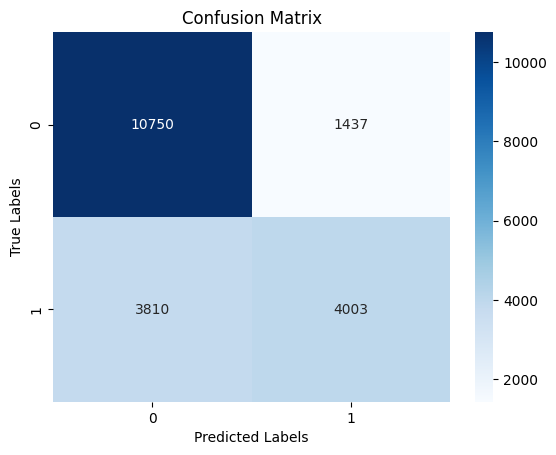

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and shuffle data
df = pd.read_csv('/content/drive/MyDrive/Dissertation/filter_data.csv')

df = df.head(100000)

# Load pre-trained Word2Vec model
model = Word2Vec.load("/content/drive/MyDrive/Dissertation/word2vecs.model")

# Function to compute Word2Vec vector for a sentence
def compute_word2vec_vector(text, model):
    if isinstance(text, str):
        words = text.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)
        else:
            return np.zeros(model.vector_size)
    else:
        return np.zeros(model.vector_size)

# Compute Word2Vec vectors and combine with VADER sentiment scores
df['word2vec_vector'] = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, model))
df['combined_features'] = df.apply(lambda row: np.concatenate([row['word2vec_vector'],
                                                               [row['compound_score'],
                                                                row['positive_score'],
                                                                row['negative_score'],
                                                                row['neutral_score']]]), axis=1)

# Convert list of arrays to a 2D array
X = np.stack(df['combined_features'].values)
y = df['labels'].values

# Optional: Reduce dimensionality with PCA
pca = PCA(n_components=50)  # Adjust the number of components
X_reduced = pca.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##Linear SVM  



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Model Accuracy with Linear SVC: 0.5795

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.92      0.72     11567
           1       0.51      0.12      0.19      8433

    accuracy                           0.58     20000
   macro avg       0.55      0.52      0.45     20000
weighted avg       0.55      0.58      0.49     20000



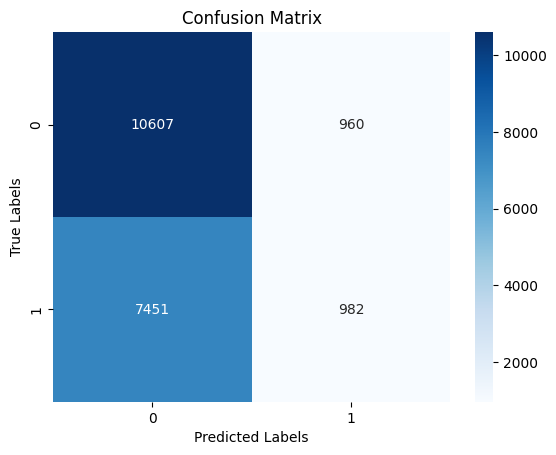

In [3]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Load and shuffle data
df = pd.read_csv('/content/drive/MyDrive/Dissertation/featured_data.csv')
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df = df.head(100000)

# Load pre-trained Word2Vec model
model = Word2Vec.load("/content/drive/MyDrive/Dissertation/word2vecs.model")

# Function to compute Word2Vec vector for a sentence
def compute_word2vec_vector(text, model):
    if isinstance(text, str):
        words = text.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)
        else:
            return np.zeros(model.vector_size)
    else:
        return np.zeros(model.vector_size)

# Compute Word2Vec vectors and combine with sentiment scores
df['word2vec_vector'] = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, model))
df['combined_features'] = df.apply(lambda row: np.concatenate([row['word2vec_vector'],
                                                               [row['compound_score'],
                                                                row['positive_score'],
                                                                row['negative_score'],
                                                                row['neutral_score']]]), axis=1)

# Convert list of arrays to a 2D array
X = np.stack(df['combined_features'].values)
y = df['labels'].values

# Optional: Reduce dimensionality with PCA
pca = PCA(n_components=50)  # Adjust the number of components
X_reduced = pca.fit_transform(X)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the Linear SVM model
model_linear_svc = LinearSVC(random_state=42)
model_linear_svc.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_linear_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy with Linear SVC: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##KNN  



Model Accuracy with KNN: 0.5505

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.63      0.62     11567
           1       0.47      0.45      0.46      8433

    accuracy                           0.55     20000
   macro avg       0.54      0.54      0.54     20000
weighted avg       0.55      0.55      0.55     20000



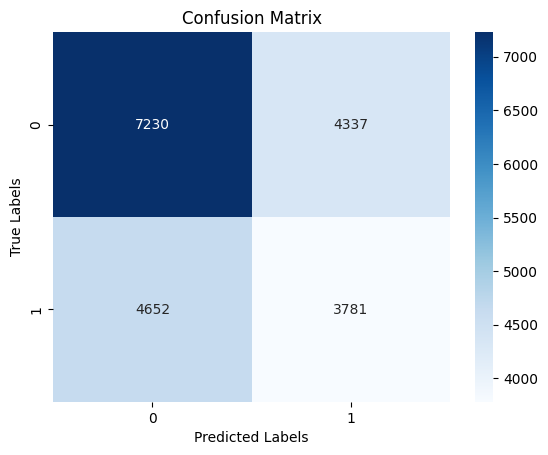

In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Load and shuffle data
df = pd.read_csv('/content/drive/MyDrive/Dissertation/featured_data.csv')
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df = df.head(100000)

# Load pre-trained Word2Vec model
model = Word2Vec.load("/content/drive/MyDrive/Dissertation/word2vecs.model")

# Function to compute Word2Vec vector for a sentence
def compute_word2vec_vector(text, model):
    if isinstance(text, str):
        words = text.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)
        else:
            return np.zeros(model.vector_size)
    else:
        return np.zeros(model.vector_size)

# Compute Word2Vec vectors and combine with sentiment scores
df['word2vec_vector'] = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, model))
df['combined_features'] = df.apply(lambda row: np.concatenate([row['word2vec_vector'],
                                                               [row['compound_score'],
                                                                row['positive_score'],
                                                                row['negative_score'],
                                                                row['neutral_score']]]), axis=1)

# Convert list of arrays to a 2D array
X = np.stack(df['combined_features'].values)
y = df['labels'].values

# Optional: Reduce dimensionality with PCA
pca = PCA(n_components=80)  # Adjust the number of components
X_reduced = pca.fit_transform(X)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the K-Nearest Neighbors model
model_knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
model_knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy with KNN: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##XGBoost

*   1K - 70%
*   10K - 71%
*   50K - 73%
*   100K - 74%



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:13:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model Accuracy with XGBoost: 0.5829

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.76      0.68     11567
           1       0.51      0.35      0.41      8433

    accuracy                           0.58     20000
   macro avg       0.56      0.55      0.54     20000
weighted avg       0.57      0.58      0.57     20000



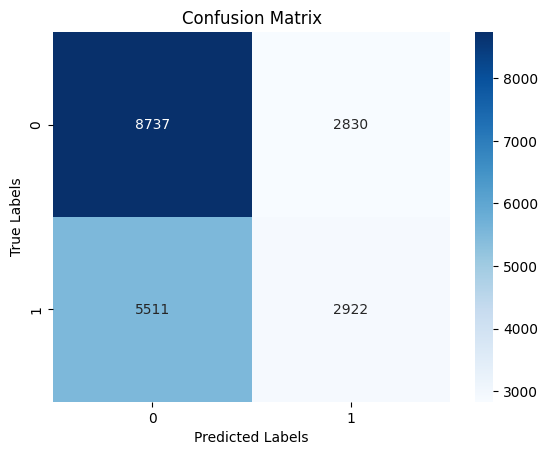

In [2]:
!pip install xgboost
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and shuffle data
df = pd.read_csv('/content/drive/MyDrive/Dissertation/featured_data.csv')
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df = df.head(100000)

# Load pre-trained Word2Vec model
model = Word2Vec.load("/content/drive/MyDrive/Dissertation/word2vecs.model")

# Function to compute Word2Vec vector for a sentence
def compute_word2vec_vector(text, model):
    if isinstance(text, str):
        words = text.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)
        else:
            return np.zeros(model.vector_size)
    else:
        return np.zeros(model.vector_size)

# Compute Word2Vec vectors and combine with sentiment scores
df['word2vec_vector'] = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, model))
df['combined_features'] = df.apply(lambda row: np.concatenate([row['word2vec_vector'],
                                                               [row['compound_score'],
                                                                row['positive_score'],
                                                                row['negative_score'],
                                                                row['neutral_score']]]), axis=1)

# Convert list of arrays to a 2D array
X = np.stack(df['combined_features'].values)
y = df['labels'].values

# Optional: Reduce dimensionality with PCA
pca = PCA(n_components=50)  # Adjust the number of components
X_reduced = pca.fit_transform(X)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model_xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy with XGBoost: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#Filtering

In [ ]:
# prompt: shuffle data of the file featured_data

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Dissertation/featured_data.csv')

# Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

# Save the shuffled data
df.to_csv('/content/drive/MyDrive/Dissertation/shuffled_data.csv', index=False)


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Dissertation/shuffled_data.csv')

# Display the original shape of the dataset
print("Original shape of the dataset:", df.shape)

# Remove rows where labels == 1 and compound_score > 0
df_filtered = df[~((df['labels'] == 1) & (df['compound_score'] > 0))]

# Display the shape of the dataset after filtering
print("Shape of the dataset after filtering:", df_filtered.shape)

# Save the filtered dataset if needed

# Display a sample of the filtered dataset
df_filtered.head()


Original shape of the dataset: (4238584, 8)
Shape of the dataset after filtering: (3450490, 8)


,labels,author_id,created_at,lemmatized_text,compound_score,positive_score,negative_score,neutral_score
0,0,4eab4bc8f4e83cdc4ba85b79,2021-12-17 18:54:09-05:00,yeah got lucky,0.6124,0.833,0.000,0.167
2,0,2fa4b022f16b604a0ddba3dc,2022-04-17 08:10:43-04:00,applied job leading canadian university head n...,-0.1511,0.000,0.065,0.935
3,1,caf018f13354ffbd8d686243,2021-02-04 20:11:57-05:00,meanwhile school required pay 5k year nonexist...,-0.1027,0.000,0.135,0.865
4,0,39a371352a70c6afdd5d0252,2022-03-10 02:38:22-05:00,depressed refusing leave house day,-0.7351,0.000,0.783,0.217
5,0,0addaa4b88edd60429bc8508,2022-04-24 16:17:12-04:00,boy slip thumb butt,0.0000,0.000,0.000,1.000


In [ ]:
df_filtered.to_csv('/content/drive/MyDrive/Dissertation/filtered_data.csv', index=False)


In [ ]:
# prompt: check how many have rows have 1 and 0 labels

# Count the occurrences of each label
label_counts = df_filtered['labels'].value_counts()

# Print the counts
print(label_counts)


labels
0    2454301
1     996189
Name: count, dtype: int64


In [ ]:
# prompt: check how many rows who have label as 0 but have 0 compound score

count = df_filtered[(df_filtered['labels'] == 0) & (df_filtered['compound_score'] == 0)].shape[0]
print(f"Number of rows with label 0 and compound score 0: {count}")


Number of rows with label 0 and compound score 0: 911878


In [ ]:
# prompt: delete those rows

# Filter out rows where 'labels' is 0 and 'compound_score' is 0
df_filtered = df_filtered[~((df_filtered['labels'] == 0) & (df_filtered['compound_score'] == 0))]

# Check the shape of the DataFrame after filtering
print("Shape of the dataset after filtering:", df_filtered.shape)


Shape of the dataset after filtering: (2538612, 8)


In [ ]:
# prompt: check how many have rows have 1 and 0 labels

# Count the occurrences of each label
label_counts = df_filtered['labels'].value_counts()

# Print the counts
print(label_counts)


labels
0    1542423
1     996189
Name: count, dtype: int64


In [ ]:
# prompt: store that in a csv file
print(df_filtered['labels'].value_counts())

df_filtered.to_csv('/content/drive/MyDrive/Dissertation/filter_data.csv', index=False)


labels
0    1542423
1     996189
Name: count, dtype: int64


#**After Enhancement**

#Machine Learning






##Random Forest


*   1K - 73%
*   10K - 71%
*   50K - 72%
*   100K - 73%






Model Accuracy: 0.7377

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80     12187
           1       0.74      0.51      0.60      7813

    accuracy                           0.74     20000
   macro avg       0.74      0.70      0.70     20000
weighted avg       0.74      0.74      0.73     20000



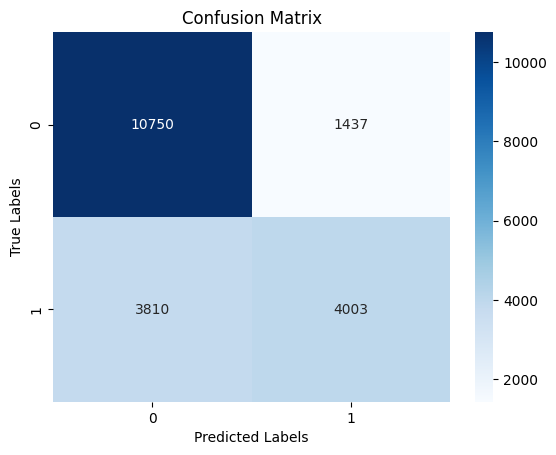

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and shuffle data
df = pd.read_csv('/content/drive/MyDrive/Dissertation/filter_data.csv')

df = df.head(100000)

# Load pre-trained Word2Vec model
model = Word2Vec.load("/content/drive/MyDrive/Dissertation/word2vecs.model")

# Function to compute Word2Vec vector for a sentence
def compute_word2vec_vector(text, model):
    if isinstance(text, str):
        words = text.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)
        else:
            return np.zeros(model.vector_size)
    else:
        return np.zeros(model.vector_size)

# Compute Word2Vec vectors and combine with VADER sentiment scores
df['word2vec_vector'] = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, model))
df['combined_features'] = df.apply(lambda row: np.concatenate([row['word2vec_vector'],
                                                               [row['compound_score'],
                                                                row['positive_score'],
                                                                row['negative_score'],
                                                                row['neutral_score']]]), axis=1)

# Convert list of arrays to a 2D array
X = np.stack(df['combined_features'].values)
y = df['labels'].values

# Optional: Reduce dimensionality with PCA
pca = PCA(n_components=50)  # Adjust the number of components
X_reduced = pca.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##Linear SVM  

*   1K - 78%
*   10K - 72%
*   50K - 70%
*   100K - 71%



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Model Accuracy with Linear SVC: 0.7117

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77     12187
           1       0.65      0.58      0.61      7813

    accuracy                           0.71     20000
   macro avg       0.70      0.69      0.69     20000
weighted avg       0.71      0.71      0.71     20000



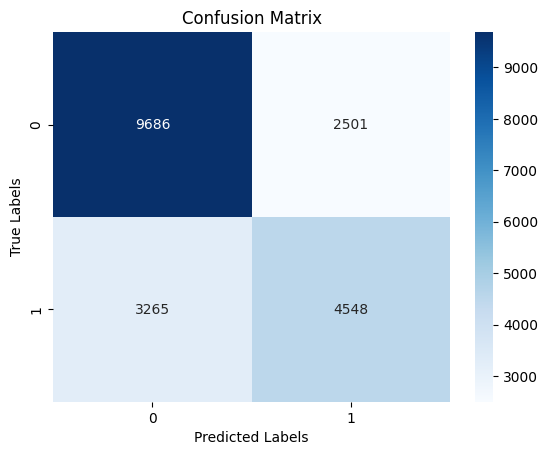

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Load and shuffle data
df = pd.read_csv('/content/drive/MyDrive/Dissertation/filter_data.csv')

df = df.head(100000)

# Load pre-trained Word2Vec model
model = Word2Vec.load("/content/drive/MyDrive/Dissertation/word2vecs.model")

# Function to compute Word2Vec vector for a sentence
def compute_word2vec_vector(text, model):
    if isinstance(text, str):
        words = text.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)
        else:
            return np.zeros(model.vector_size)
    else:
        return np.zeros(model.vector_size)

# Compute Word2Vec vectors and combine with sentiment scores
df['word2vec_vector'] = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, model))
df['combined_features'] = df.apply(lambda row: np.concatenate([row['word2vec_vector'],
                                                               [row['compound_score'],
                                                                row['positive_score'],
                                                                row['negative_score'],
                                                                row['neutral_score']]]), axis=1)

# Convert list of arrays to a 2D array
X = np.stack(df['combined_features'].values)
y = df['labels'].values

# Optional: Reduce dimensionality with PCA
pca = PCA(n_components=50)  # Adjust the number of components
X_reduced = pca.fit_transform(X)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the Linear SVM model
model_linear_svc = LinearSVC(random_state=42)
model_linear_svc.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_linear_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy with Linear SVC: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##KNN  

*   1K - 70%
*   10K - 70%
*   50K - 70%
*   100K - 71%




Model Accuracy with KNN: 0.7104

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77     12187
           1       0.65      0.56      0.60      7813

    accuracy                           0.71     20000
   macro avg       0.70      0.68      0.69     20000
weighted avg       0.71      0.71      0.71     20000



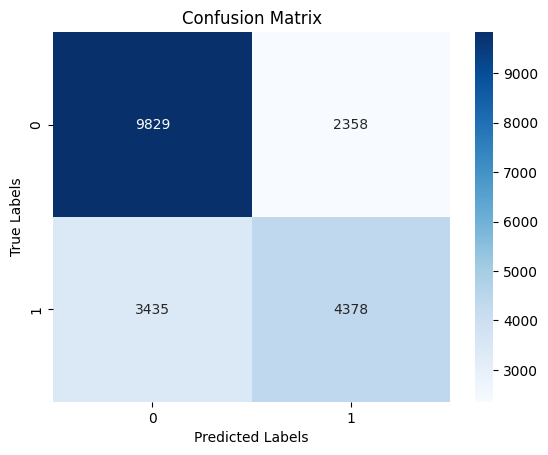

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Load and shuffle data
df = pd.read_csv('/content/drive/MyDrive/Dissertation/filter_data.csv')

df = df.head(100000)

# Load pre-trained Word2Vec model
model = Word2Vec.load("/content/drive/MyDrive/Dissertation/word2vecs.model")

# Function to compute Word2Vec vector for a sentence
def compute_word2vec_vector(text, model):
    if isinstance(text, str):
        words = text.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)
        else:
            return np.zeros(model.vector_size)
    else:
        return np.zeros(model.vector_size)

# Compute Word2Vec vectors and combine with sentiment scores
df['word2vec_vector'] = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, model))
df['combined_features'] = df.apply(lambda row: np.concatenate([row['word2vec_vector'],
                                                               [row['compound_score'],
                                                                row['positive_score'],
                                                                row['negative_score'],
                                                                row['neutral_score']]]), axis=1)

# Convert list of arrays to a 2D array
X = np.stack(df['combined_features'].values)
y = df['labels'].values

# Optional: Reduce dimensionality with PCA
pca = PCA(n_components=80)  # Adjust the number of components
X_reduced = pca.fit_transform(X)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the K-Nearest Neighbors model
model_knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
model_knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy with KNN: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##XGBoost

*   1K - 70%
*   10K - 71%
*   50K - 73%
*   100K - 74%



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:22:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model Accuracy with XGBoost: 0.7479

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80     12187
           1       0.70      0.62      0.66      7813

    accuracy                           0.75     20000
   macro avg       0.74      0.73      0.73     20000
weighted avg       0.74      0.75      0.74     20000



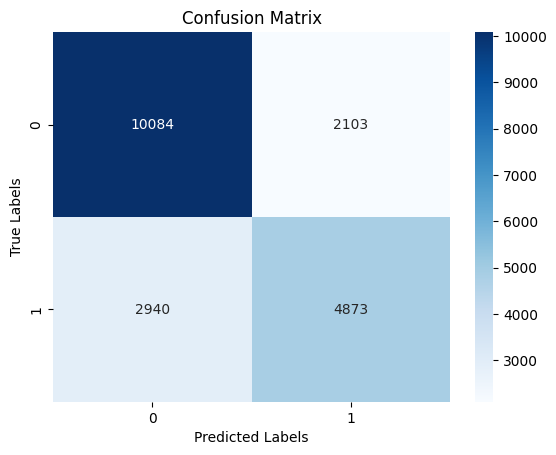

In [ ]:
!pip install xgboost
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and shuffle data
df = pd.read_csv('/content/drive/MyDrive/Dissertation/filter_data.csv')

df = df.head(100000)

# Load pre-trained Word2Vec model
model = Word2Vec.load("/content/drive/MyDrive/Dissertation/word2vecs.model")

# Function to compute Word2Vec vector for a sentence
def compute_word2vec_vector(text, model):
    if isinstance(text, str):
        words = text.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)
        else:
            return np.zeros(model.vector_size)
    else:
        return np.zeros(model.vector_size)

# Compute Word2Vec vectors and combine with sentiment scores
df['word2vec_vector'] = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, model))
df['combined_features'] = df.apply(lambda row: np.concatenate([row['word2vec_vector'],
                                                               [row['compound_score'],
                                                                row['positive_score'],
                                                                row['negative_score'],
                                                                row['neutral_score']]]), axis=1)

# Convert list of arrays to a 2D array
X = np.stack(df['combined_features'].values)
y = df['labels'].values

# Optional: Reduce dimensionality with PCA
pca = PCA(n_components=50)  # Adjust the number of components
X_reduced = pca.fit_transform(X)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model_xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy with XGBoost: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#Deep Learning

##CNN

*   1K - 68%
*   10K - 79%
*   50K - 83%
*   100K - 84%

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - accuracy: 0.7540 - loss: 0.4611 - val_accuracy: 0.8238 - val_loss: 0.2934
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - accuracy: 0.8267 - loss: 0.2936 - val_accuracy: 0.8292 - val_loss: 0.2705
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.8336 - loss: 0.2752 - val_accuracy: 0.8286 - val_loss: 0.2680
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.8348 - loss: 0.2693 - val_accuracy: 0.8356 - val_loss: 0.2655
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8383 - loss: 0.2651 - val_accuracy: 0.8350 - val_loss: 0.2658
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8400 - loss: 0.2626 - val_accuracy: 0.8355 - val_loss: 0.2664
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8411 - loss: 0.2614 - val_accuracy: 0.8370 - val_loss: 0.2618
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.8408 -

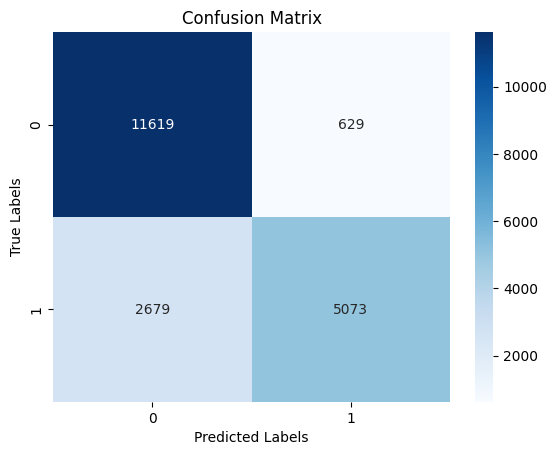

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, concatenate
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and shuffle data
df = pd.read_csv('/content/drive/MyDrive/Dissertation/filter_data.csv')

# Reduce dataset size for testing
df = df.sample(n=100000, random_state=42)  # Sample 1000 rows

# Load pre-trained Word2Vec model
word2vec_model = Word2Vec.load("/content/drive/MyDrive/Dissertation/word2vecs.model")

# Function to compute Word2Vec vector for a sentence
def compute_word2vec_vector(text, model):
    if isinstance(text, str):
        words = text.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)  # Average the word vectors
        else:
            return np.zeros(model.vector_size)  # Return a zero vector if no words are found
    else:
        return np.zeros(model.vector_size)

# Compute Word2Vec vectors and combine with sentiment scores
df['word2vec_vector'] = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, word2vec_model))
df['combined_features'] = df.apply(lambda row: np.concatenate([row['word2vec_vector'],
                                                               [row['compound_score'],
                                                                row['positive_score'],
                                                                row['negative_score'],
                                                                row['neutral_score']]]), axis=1)

# Convert list of arrays to a 2D array for combined features
X_combined = np.stack(df['combined_features'].values)

# Prepare sequences of word vectors
sequences = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, word2vec_model))
maxlen = 20  # Maximum length of sequences
X_sequences = pad_sequences([np.array([wv]) for wv in sequences], maxlen=maxlen, dtype='float32', padding='post', truncating='post')

# Encode labels
y = df['labels'].values
y = to_categorical(y)  # One-hot encoding

# Split the data
X_train_seq, X_test_seq, X_train_comb, X_test_comb, y_train, y_test = train_test_split(X_sequences, X_combined, y, test_size=0.2, random_state=42)

# Define the CNN model for sequential word processing
word_input = Input(shape=(maxlen, word2vec_model.vector_size))
conv1 = Conv1D(128, 5, activation='relu')(word_input)
pool1 = MaxPooling1D(pool_size=2)(conv1)
conv2 = Conv1D(128, 5, activation='relu')(pool1)
pool2 = MaxPooling1D(pool_size=2)(conv2)
flatten = Flatten()(pool2)

# Combine with additional features (e.g., sentiment scores)
sentiment_input = Input(shape=(X_combined.shape[1],))
combined_features = concatenate([flatten, sentiment_input])

# Dense layers for final classification
x = Dense(64, activation='relu')(combined_features)
x = Dropout(0.5)(x)
output = Dense(2, activation='softmax')(x)  # Assuming binary classification

# Define the model
model = Model(inputs=[word_input, sentiment_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit([X_train_seq, X_train_comb], y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred_probs = model.predict([X_test_seq, X_test_comb])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
print(f"\nModel Accuracy with CNN and Combined Features: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.7504 - loss: 0.4672 - val_accuracy: 0.8278 - val_loss: 0.2941
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.8297 - loss: 0.2951 - val_accuracy: 0.8298 - val_loss: 0.2732
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.8353 - loss: 0.2753 - val_accuracy: 0.8367 - val_loss: 0.2653
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.8401 - loss: 0.2659 - val_accuracy: 0.8363 - val_loss: 0.2632
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8423 - loss: 0.2633 - val_accuracy: 0.8353 - val_loss: 0.2635
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.8402 - loss: 0.2625 - val_accuracy: 0.8389 - val_loss: 0.2609
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8445 - loss: 0.2593 - val_accuracy: 0.8388 - val_loss: 0.2626
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8437 -

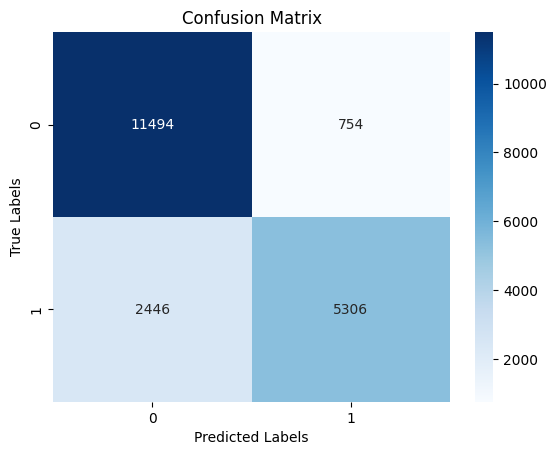

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, concatenate
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and shuffle data
df = pd.read_csv('/content/drive/MyDrive/Dissertation/filter_data.csv')

# Reduce dataset size for testing
df = df.sample(n=100000, random_state=42)  # Sample 1000 rows

# Load pre-trained Word2Vec model
word2vec_model = Word2Vec.load("/content/drive/MyDrive/Dissertation/word2vecs.model")

# Function to compute Word2Vec vector for a sentence
def compute_word2vec_vector(text, model):
    if isinstance(text, str):
        words = text.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)  # Average the word vectors
        else:
            return np.zeros(model.vector_size)  # Return a zero vector if no words are found
    else:
        return np.zeros(model.vector_size)

# Compute Word2Vec vectors and combine with sentiment scores
df['word2vec_vector'] = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, word2vec_model))
df['combined_features'] = df.apply(lambda row: np.concatenate([row['word2vec_vector'],
                                                               [row['compound_score'],
                                                                row['positive_score'],
                                                                row['negative_score'],
                                                                row['neutral_score']]]), axis=1)

# Convert list of arrays to a 2D array for combined features
X_combined = np.stack(df['combined_features'].values)

# Prepare sequences of word vectors
sequences = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, word2vec_model))
maxlen = 20  # Maximum length of sequences
X_sequences = pad_sequences([np.array([wv]) for wv in sequences], maxlen=maxlen, dtype='float32', padding='post', truncating='post')

# Encode labels
y = df['labels'].values
y = to_categorical(y)  # One-hot encoding

# Split the data
X_train_seq, X_test_seq, X_train_comb, X_test_comb, y_train, y_test = train_test_split(X_sequences, X_combined, y, test_size=0.2, random_state=42)

# Define the CNN model for sequential word processing
word_input = Input(shape=(maxlen, word2vec_model.vector_size))
conv1 = Conv1D(128, 5, activation='relu')(word_input)
pool1 = MaxPooling1D(pool_size=2)(conv1)
conv2 = Conv1D(128, 5, activation='relu')(pool1)
pool2 = MaxPooling1D(pool_size=2)(conv2)
flatten = Flatten()(pool2)

# Combine with additional features (e.g., sentiment scores)
sentiment_input = Input(shape=(X_combined.shape[1],))
combined_features = concatenate([flatten, sentiment_input])

# Dense layers for final classification
x = Dense(64, activation='relu')(combined_features)
x = Dropout(0.5)(x)
output = Dense(2, activation='softmax')(x)  # Assuming binary classification

# Define the model
model = Model(inputs=[word_input, sentiment_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit([X_train_seq, X_train_comb], y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred_probs = model.predict([X_test_seq, X_test_comb])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
print(f"\nModel Accuracy with CNN and Combined Features: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##GRU

*   1K - 75%
*   10K - 81%
*   50K - 83%
*   100K - 84%

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 73s 30ms/step - accuracy: 0.7338 - loss: 0.4972 - val_accuracy: 0.8217 - val_loss: 0.2992
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 54s 24ms/step - accuracy: 0.8228 - loss: 0.3064 - val_accuracy: 0.8254 - val_loss: 0.2749
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.8333 - loss: 0.2795 - val_accuracy: 0.8311 - val_loss: 0.2674
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.8346 - loss: 0.2733 - val_accuracy: 0.8299 - val_loss: 0.2634
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 57s 25ms/step - accuracy: 0.8365 - loss: 0.2684 - val_accuracy: 0.8357 - val_loss: 0.2650
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 53s 24ms/step - accuracy: 0.8351 - loss: 0.2666 - val_accuracy: 0.8319 - val_loss: 0.2613
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 56s 25ms/step - accuracy: 0.8407 - loss: 0.2621 - val_accuracy: 0.8369 - val_loss: 0.2611
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 55s 25ms/step - accuracy: 0.8432 -

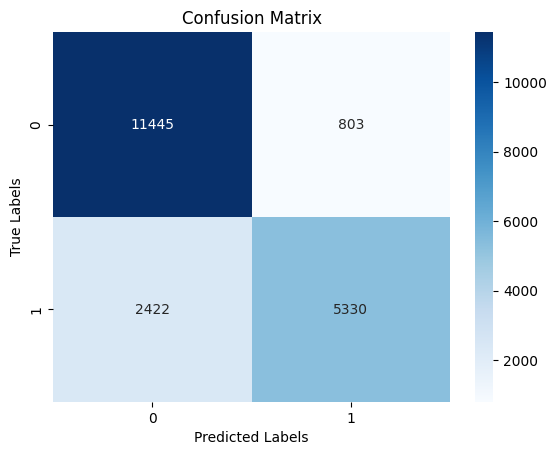

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Dropout, concatenate
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and shuffle data
df = pd.read_csv('/content/drive/MyDrive/Dissertation/filter_data.csv')

# Reduce dataset size for testing
df = df.sample(n=100000, random_state=42)  # Sample 1000 rows

# Load pre-trained Word2Vec model
word2vec_model = Word2Vec.load("/content/drive/MyDrive/Dissertation/word2vecs.model")

# Function to compute Word2Vec vector for a sentence
def compute_word2vec_vector(text, model):
    if isinstance(text, str):
        words = text.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)  # Average the word vectors
        else:
            return np.zeros(model.vector_size)  # Return a zero vector if no words are found
    else:
        return np.zeros(model.vector_size)

# Compute Word2Vec vectors and combine with sentiment scores
df['word2vec_vector'] = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, word2vec_model))
df['combined_features'] = df.apply(lambda row: np.concatenate([row['word2vec_vector'],
                                                               [row['compound_score'],
                                                                row['positive_score'],
                                                                row['negative_score'],
                                                                row['neutral_score']]]), axis=1)

# Convert list of arrays to a 2D array for combined features
X_combined = np.stack(df['combined_features'].values)

# Prepare sequences of word vectors
sequences = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, word2vec_model))
maxlen = 20  # Maximum length of sequences
X_sequences = pad_sequences([np.array([wv]) for wv in sequences], maxlen=maxlen, dtype='float32', padding='post', truncating='post')

# Encode labels
y = df['labels'].values
y = to_categorical(y)  # One-hot encoding

# Split the data
X_train_seq, X_test_seq, X_train_comb, X_test_comb, y_train, y_test = train_test_split(X_sequences, X_combined, y, test_size=0.2, random_state=42)

# Define the GRU model for sequential word processing
word_input = Input(shape=(maxlen, word2vec_model.vector_size))
gru_output = GRU(128, return_sequences=False)(word_input)

# Combine with additional features (e.g., sentiment scores)
sentiment_input = Input(shape=(X_combined.shape[1],))
combined_features = concatenate([gru_output, sentiment_input])

# Dense layers for final classification
x = Dense(64, activation='relu')(combined_features)
x = Dropout(0.5)(x)
output = Dense(2, activation='softmax')(x)  # Assuming binary classification

# Define the model
model = Model(inputs=[word_input, sentiment_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit([X_train_seq, X_train_comb], y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred_probs = model.predict([X_test_seq, X_test_comb])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
print(f"\nModel Accuracy with GRU and Combined Features: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##LSTM

*   1K - 69%
*   10K - 81%
*   50K - 83%
*   100K - 84%

Epoch 1/10
2250/2250 [==============================] - 34s 14ms/step - loss: 0.4028 - accuracy: 0.7819 - val_loss: 0.3020 - val_accuracy: 0.8181
Epoch 2/10
2250/2250 [==============================] - 33s 15ms/step - loss: 0.2952 - accuracy: 0.8261 - val_loss: 0.2787 - val_accuracy: 0.8213
Epoch 3/10
2250/2250 [==============================] - 34s 15ms/step - loss: 0.2772 - accuracy: 0.8311 - val_loss: 0.2662 - val_accuracy: 0.8310
Epoch 4/10
2250/2250 [==============================] - 30s 14ms/step - loss: 0.2705 - accuracy: 0.8360 - val_loss: 0.2654 - val_accuracy: 0.8344
Epoch 5/10
2250/2250 [==============================] - 34s 15ms/step - loss: 0.2657 - accuracy: 0.8381 - val_loss: 0.2628 - val_accuracy: 0.8345
Epoch 6/10
2250/2250 [==============================] - 33s 15ms/step - loss: 0.2647 - accuracy: 0.8385 - val_loss: 0.2611 - val_accuracy: 0.8403
Epoch 7/10
2250/2250 [==============================] - 33s 15ms/step - loss: 0.2634 - accuracy: 0.8369 - val_loss: 0.2587 -

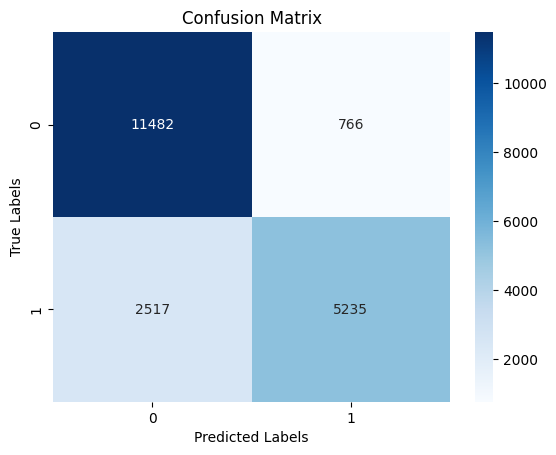

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, concatenate
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and shuffle data
df = pd.read_csv('/content/drive/MyDrive/Dissertation/filter_data.csv')

# Reduce dataset size for testing
df = df.sample(n=100000, random_state=42)  # Sample 100,000 rows

# Load pre-trained Word2Vec model
word2vec_model = Word2Vec.load("/content/drive/MyDrive/Dissertation/word2vecs.model")

# Function to compute Word2Vec vector for a sentence
def compute_word2vec_vector(text, model):
    if isinstance(text, str):
        words = text.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)  # Average the word vectors
        else:
            return np.zeros(model.vector_size)  # Return a zero vector if no words are found
    else:
        return np.zeros(model.vector_size)

# Compute Word2Vec vectors and combine with sentiment scores
df['word2vec_vector'] = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, word2vec_model))
df['combined_features'] = df.apply(lambda row: np.concatenate([row['word2vec_vector'],
                                                               [row['compound_score'],
                                                                row['positive_score'],
                                                                row['negative_score'],
                                                                row['neutral_score']]]), axis=1)

# Convert list of arrays to a 2D array for combined features
X_combined = np.stack(df['combined_features'].values)

# Prepare sequences of word vectors
sequences = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, word2vec_model))
maxlen = 20  # Maximum length of sequences
X_sequences = pad_sequences([np.array([wv]) for wv in sequences], maxlen=maxlen, dtype='float32', padding='post', truncating='post')

# Encode labels
y = df['labels'].values
y = to_categorical(y)  # One-hot encoding

# Split the data
X_train_seq, X_test_seq, X_train_comb, X_test_comb, y_train, y_test = train_test_split(X_sequences, X_combined, y, test_size=0.2, random_state=42)

# Define the LSTM model for sequential word processing
word_input = Input(shape=(maxlen, word2vec_model.vector_size))
lstm_output = LSTM(128, return_sequences=False)(word_input)

# Combine with additional features (e.g., sentiment scores)
sentiment_input = Input(shape=(X_combined.shape[1],))
combined_features = concatenate([lstm_output, sentiment_input])

# Dense layers for final classification
x = Dense(64, activation='relu')(combined_features)
x = Dropout(0.5)(x)
output = Dense(2, activation='softmax')(x)  # Assuming binary classification

# Define the model
model = Model(inputs=[word_input, sentiment_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit([X_train_seq, X_train_comb], y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred_probs = model.predict([X_test_seq, X_test_comb])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
print(f"\nModel Accuracy with LSTM and Combined Features: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##BiLSTM

*   1K - 68%
*   10K - 80%
*   50K - 83%
*   100K - 84%

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 152s 66ms/step - accuracy: 0.7481 - loss: 0.4705 - val_accuracy: 0.8267 - val_loss: 0.2935
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 148s 66ms/step - accuracy: 0.8265 - loss: 0.2960 - val_accuracy: 0.8301 - val_loss: 0.2717
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 208s 69ms/step - accuracy: 0.8324 - loss: 0.2765 - val_accuracy: 0.8357 - val_loss: 0.2667
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 198s 67ms/step - accuracy: 0.8404 - loss: 0.2643 - val_accuracy: 0.8365 - val_loss: 0.2628
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 196s 65ms/step - accuracy: 0.8403 - loss: 0.2648 - val_accuracy: 0.8350 - val_loss: 0.2614
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 145s 64ms/step - accuracy: 0.8403 - loss: 0.2625 - val_accuracy: 0.8411 - val_loss: 0.2604
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 206s 66ms/step - accuracy: 0.8436 - loss: 0.2571 - val_accuracy: 0.8384 - val_loss: 0.2601
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 145s 64ms/step - accuracy: 

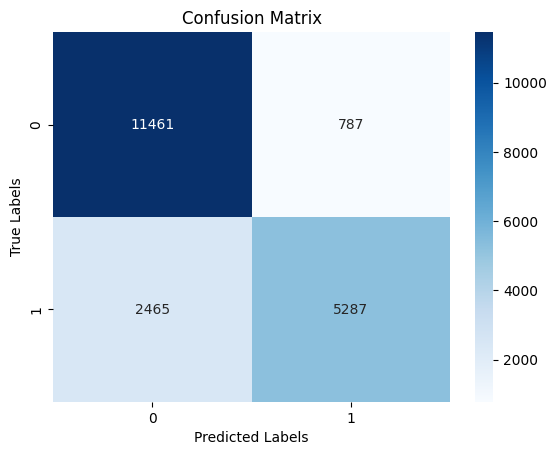

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, Dropout, concatenate
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and shuffle data
df = pd.read_csv('/content/drive/MyDrive/Dissertation/filter_data.csv')

# Reduce dataset size for testing
df = df.sample(n=100000, random_state=42)  # Sample 100,000 rows

# Load pre-trained Word2Vec model
word2vec_model = Word2Vec.load("/content/drive/MyDrive/Dissertation/word2vecs.model")

# Function to compute Word2Vec vector for a sentence
def compute_word2vec_vector(text, model):
    if isinstance(text, str):
        words = text.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)  # Average the word vectors
        else:
            return np.zeros(model.vector_size)  # Return a zero vector if no words are found
    else:
        return np.zeros(model.vector_size)

# Compute Word2Vec vectors and combine with sentiment scores
df['word2vec_vector'] = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, word2vec_model))
df['combined_features'] = df.apply(lambda row: np.concatenate([row['word2vec_vector'],
                                                               [row['compound_score'],
                                                                row['positive_score'],
                                                                row['negative_score'],
                                                                row['neutral_score']]]), axis=1)

# Convert list of arrays to a 2D array for combined features
X_combined = np.stack(df['combined_features'].values)

# Prepare sequences of word vectors
sequences = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, word2vec_model))
maxlen = 20  # Maximum length of sequences
X_sequences = pad_sequences([np.array([wv]) for wv in sequences], maxlen=maxlen, dtype='float32', padding='post', truncating='post')

# Encode labels
y = df['labels'].values
y = to_categorical(y)  # One-hot encoding

# Split the data
X_train_seq, X_test_seq, X_train_comb, X_test_comb, y_train, y_test = train_test_split(X_sequences, X_combined, y, test_size=0.2, random_state=42)

# Define the BiLSTM model for sequential word processing
word_input = Input(shape=(maxlen, word2vec_model.vector_size))
bilstm_output = Bidirectional(LSTM(128, return_sequences=False))(word_input)

# Combine with additional features (e.g., sentiment scores)
sentiment_input = Input(shape=(X_combined.shape[1],))
combined_features = concatenate([bilstm_output, sentiment_input])

# Dense layers for final classification
x = Dense(64, activation='relu')(combined_features)
x = Dropout(0.5)(x)
output = Dense(2, activation='softmax')(x)  # Assuming binary classification

# Define the model
model = Model(inputs=[word_input, sentiment_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit([X_train_seq, X_train_comb], y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred_probs = model.predict([X_test_seq, X_test_comb])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
print(f"\nModel Accuracy with BiLSTM and Combined Features: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#Hybrid Approaches


##CNN x XGBoost

*   1K - 79%
*   10K - 82%
*   50K - 83%
*   100K - 83%

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:21:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model Accuracy with CNN + XGBoost: 0.8331

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87     12248
           1       0.80      0.75      0.78      7752

    accuracy                           0.83     20000
   macro avg       0.83      0.82      0.82     20000
weighted avg       0.83      0.83      0.83     20000



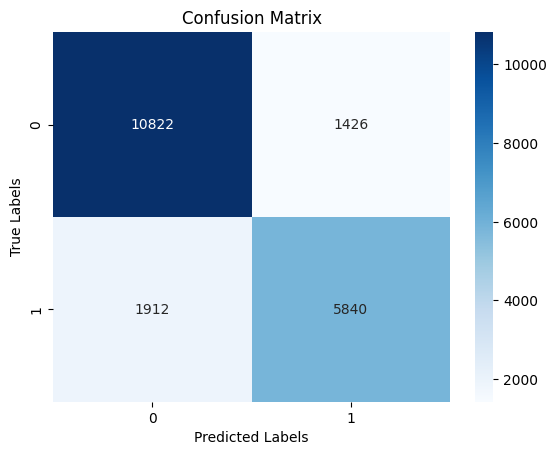

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, concatenate
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load and shuffle data
df = pd.read_csv('/content/drive/MyDrive/Dissertation/filter_data.csv')
df = df.sample(n=100000, random_state=42)

# Load pre-trained Word2Vec model
word2vec_model = Word2Vec.load("/content/drive/MyDrive/Dissertation/word2vecs.model")

# Function to compute Word2Vec vector for a sentence
def compute_word2vec_vector(text, model):
    if isinstance(text, str):
        words = text.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)  # Average the word vectors
        else:
            return np.zeros(model.vector_size)  # Return a zero vector if no words are found
    else:
        return np.zeros(model.vector_size)

# Compute Word2Vec vectors and combine with sentiment scores
df['word2vec_vector'] = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, word2vec_model))
df['combined_features'] = df.apply(lambda row: np.concatenate([row['word2vec_vector'],
                                                               [row['compound_score'],
                                                                row['positive_score'],
                                                                row['negative_score'],
                                                                row['neutral_score']]]), axis=1)

# Convert list of arrays to a 2D array for combined features
X_combined = np.stack(df['combined_features'].values)

# Prepare sequences of word vectors
sequences = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, word2vec_model))
maxlen = 20  # Maximum length of sequences
X_sequences = pad_sequences([np.array([wv]) for wv in sequences], maxlen=maxlen, dtype='float32', padding='post', truncating='post')

# Encode labels
y = df['labels'].values

# Split the data
X_train_seq, X_test_seq, X_train_comb, X_test_comb, y_train, y_test = train_test_split(X_sequences, X_combined, y, test_size=0.2, random_state=42)

# Define the CNN model for feature extraction
word_input = Input(shape=(maxlen, word2vec_model.vector_size))
conv1 = Conv1D(128, 5, activation='relu')(word_input)
pool1 = MaxPooling1D(pool_size=2)(conv1)
conv2 = Conv1D(128, 5, activation='relu')(pool1)
pool2 = MaxPooling1D(pool_size=2)(conv2)
flatten = Flatten()(pool2)

# Define a separate model to extract features
cnn_model = Model(inputs=word_input, outputs=flatten)

# Extract features using the CNN model
X_train_cnn_features = cnn_model.predict(X_train_seq)
X_test_cnn_features = cnn_model.predict(X_test_seq)

# Combine CNN features with additional features (e.g., sentiment scores)
X_train_combined = np.concatenate([X_train_cnn_features, X_train_comb], axis=1)
X_test_combined = np.concatenate([X_test_cnn_features, X_test_comb], axis=1)

# Train XGBoost on the combined features
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_combined, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_combined)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy with CNN + XGBoost: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##GRU x XGBoost

*   1K - 79%
*   10K - 83%
*   50K - 83%
*   100K - 83%

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:31:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model Accuracy with GRU + XGBoost: 0.8353

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     12248
           1       0.81      0.76      0.78      7752

    accuracy                           0.84     20000
   macro avg       0.83      0.82      0.82     20000
weighted avg       0.83      0.84      0.83     20000



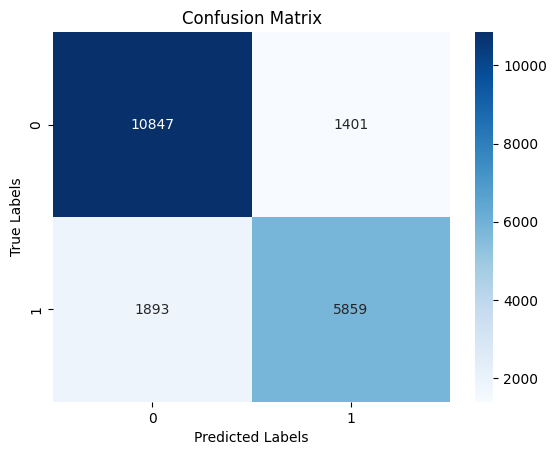

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Dropout, concatenate
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load and shuffle data
df = pd.read_csv('/content/drive/MyDrive/Dissertation/filter_data.csv')
df = df.sample(n=100000, random_state=42)

# Load pre-trained Word2Vec model
word2vec_model = Word2Vec.load("/content/drive/MyDrive/Dissertation/word2vecs.model")

# Function to compute Word2Vec vector for a sentence
def compute_word2vec_vector(text, model):
    if isinstance(text, str):
        words = text.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)  # Average the word vectors
        else:
            return np.zeros(model.vector_size)  # Return a zero vector if no words are found
    else:
        return np.zeros(model.vector_size)

# Compute Word2Vec vectors and combine with sentiment scores
df['word2vec_vector'] = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, word2vec_model))
df['combined_features'] = df.apply(lambda row: np.concatenate([row['word2vec_vector'],
                                                               [row['compound_score'],
                                                                row['positive_score'],
                                                                row['negative_score'],
                                                                row['neutral_score']]]), axis=1)

# Convert list of arrays to a 2D array for combined features
X_combined = np.stack(df['combined_features'].values)

# Prepare sequences of word vectors
sequences = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, word2vec_model))
maxlen = 20  # Maximum length of sequences
X_sequences = pad_sequences([np.array([wv]) for wv in sequences], maxlen=maxlen, dtype='float32', padding='post', truncating='post')

# Encode labels
y = df['labels'].values

# Split the data
X_train_seq, X_test_seq, X_train_comb, X_test_comb, y_train, y_test = train_test_split(X_sequences, X_combined, y, test_size=0.2, random_state=42)

# Define the GRU model for feature extraction
word_input = Input(shape=(maxlen, word2vec_model.vector_size))
gru_output = GRU(128, return_sequences=False)(word_input)

# Define a separate model to extract features
gru_model = Model(inputs=word_input, outputs=gru_output)

# Extract features using the GRU model
X_train_gru_features = gru_model.predict(X_train_seq)
X_test_gru_features = gru_model.predict(X_test_seq)

# Combine GRU features with additional features (e.g., sentiment scores)
X_train_combined = np.concatenate([X_train_gru_features, X_train_comb], axis=1)
X_test_combined = np.concatenate([X_test_gru_features, X_test_comb], axis=1)

# Train XGBoost on the combined features
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_combined, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_combined)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy with GRU + XGBoost: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##CNN x GRU

*   1K - 69%
*   10K - 80%
*   50K - 84%
*   100K - 84%

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 58s 25ms/step - accuracy: 0.7349 - loss: 0.4957 - val_accuracy: 0.8253 - val_loss: 0.3005
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 79s 23ms/step - accuracy: 0.8254 - loss: 0.3020 - val_accuracy: 0.8317 - val_loss: 0.2731
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 54s 24ms/step - accuracy: 0.8350 - loss: 0.2770 - val_accuracy: 0.8378 - val_loss: 0.2646
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 55s 24ms/step - accuracy: 0.8367 - loss: 0.2691 - val_accuracy: 0.8395 - val_loss: 0.2620
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 53s 24ms/step - accuracy: 0.8376 - loss: 0.2645 - val_accuracy: 0.8351 - val_loss: 0.2616
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - accuracy: 0.8407 - loss: 0.2616 - val_accuracy: 0.8369 - val_loss: 0.2618
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 84s 25ms/step - accuracy: 0.8424 - loss: 0.2602 - val_accuracy: 0.8376 - val_loss: 0.2607
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.8460 -

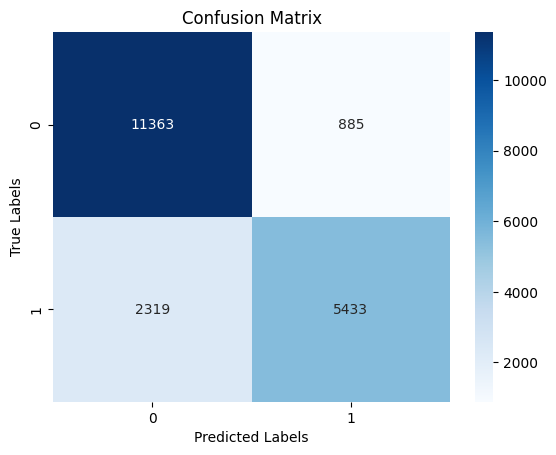

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, GRU, Flatten, Dense, Dropout, concatenate
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and shuffle data
df = pd.read_csv('/content/drive/MyDrive/Dissertation/filter_data.csv')

# Reduce dataset size for testing
df = df.sample(n=100000, random_state=42)

# Load pre-trained Word2Vec model
word2vec_model = Word2Vec.load("/content/drive/MyDrive/Dissertation/word2vecs.model")

# Function to compute Word2Vec vector for a sentence
def compute_word2vec_vector(text, model):
    if isinstance(text, str):
        words = text.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)  # Average the word vectors
        else:
            return np.zeros(model.vector_size)  # Return a zero vector if no words are found
    else:
        return np.zeros(model.vector_size)

# Compute Word2Vec vectors and combine with sentiment scores
df['word2vec_vector'] = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, word2vec_model))
df['combined_features'] = df.apply(lambda row: np.concatenate([row['word2vec_vector'],
                                                               [row['compound_score'],
                                                                row['positive_score'],
                                                                row['negative_score'],
                                                                row['neutral_score']]]), axis=1)

# Convert list of arrays to a 2D array for combined features
X_combined = np.stack(df['combined_features'].values)

# Prepare sequences of word vectors
sequences = df['lemmatized_text'].apply(lambda text: compute_word2vec_vector(text, word2vec_model))
maxlen = 20  # Maximum length of sequences
X_sequences = pad_sequences([np.array([wv]) for wv in sequences], maxlen=maxlen, dtype='float32', padding='post', truncating='post')

# Encode labels
y = df['labels'].values
y = to_categorical(y)  # One-hot encoding

# Split the data
X_train_seq, X_test_seq, X_train_comb, X_test_comb, y_train, y_test = train_test_split(X_sequences, X_combined, y, test_size=0.2, random_state=42)

# Define the CNN model for sequential word processing
word_input = Input(shape=(maxlen, word2vec_model.vector_size))
conv1 = Conv1D(128, 5, activation='relu')(word_input)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Apply GRU after CNN layers
gru_output = GRU(128, return_sequences=False)(pool1)

# Combine with additional features (e.g., sentiment scores)
sentiment_input = Input(shape=(X_combined.shape[1],))
combined_features = concatenate([gru_output, sentiment_input])

# Dense layers for final classification
x = Dense(64, activation='relu')(combined_features)
x = Dropout(0.5)(x)
output = Dense(2, activation='softmax')(x)  # Assuming binary classification

# Define the model
model = Model(inputs=[word_input, sentiment_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit([X_train_seq, X_train_comb], y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred_probs = model.predict([X_test_seq, X_test_comb])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
print(f"\nModel Accuracy with CNN + GRU and Combined Features: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
